# **Iris Species Classification Using Machine Learning**

## **1. Introduction**
In this project, we will classify Iris flowers into three species—Iris setosa, Iris versicolor, and Iris virginica—using their petal and sepal measurements. We will explore the dataset, preprocess it, and build classification models using Logistic Regression and K-Nearest Neighbors (KNN).

## **2. Importing Required Libraries**

In [92]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## **3. Loading the Dataset**

In [93]:
# Load the dataset
data = pd.read_csv("Iris.csv")

# Display the first few rows
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## **4. Exploratory Data Analysis (EDA)**

### **4.1. Dataset Summary**

In [94]:
# Summary of the dataset
print(data.info())
print(data.describe())

# Check for missing values
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000    

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## **4.2. Data Visualization**
**Pairplot to Visualize Features by Species**

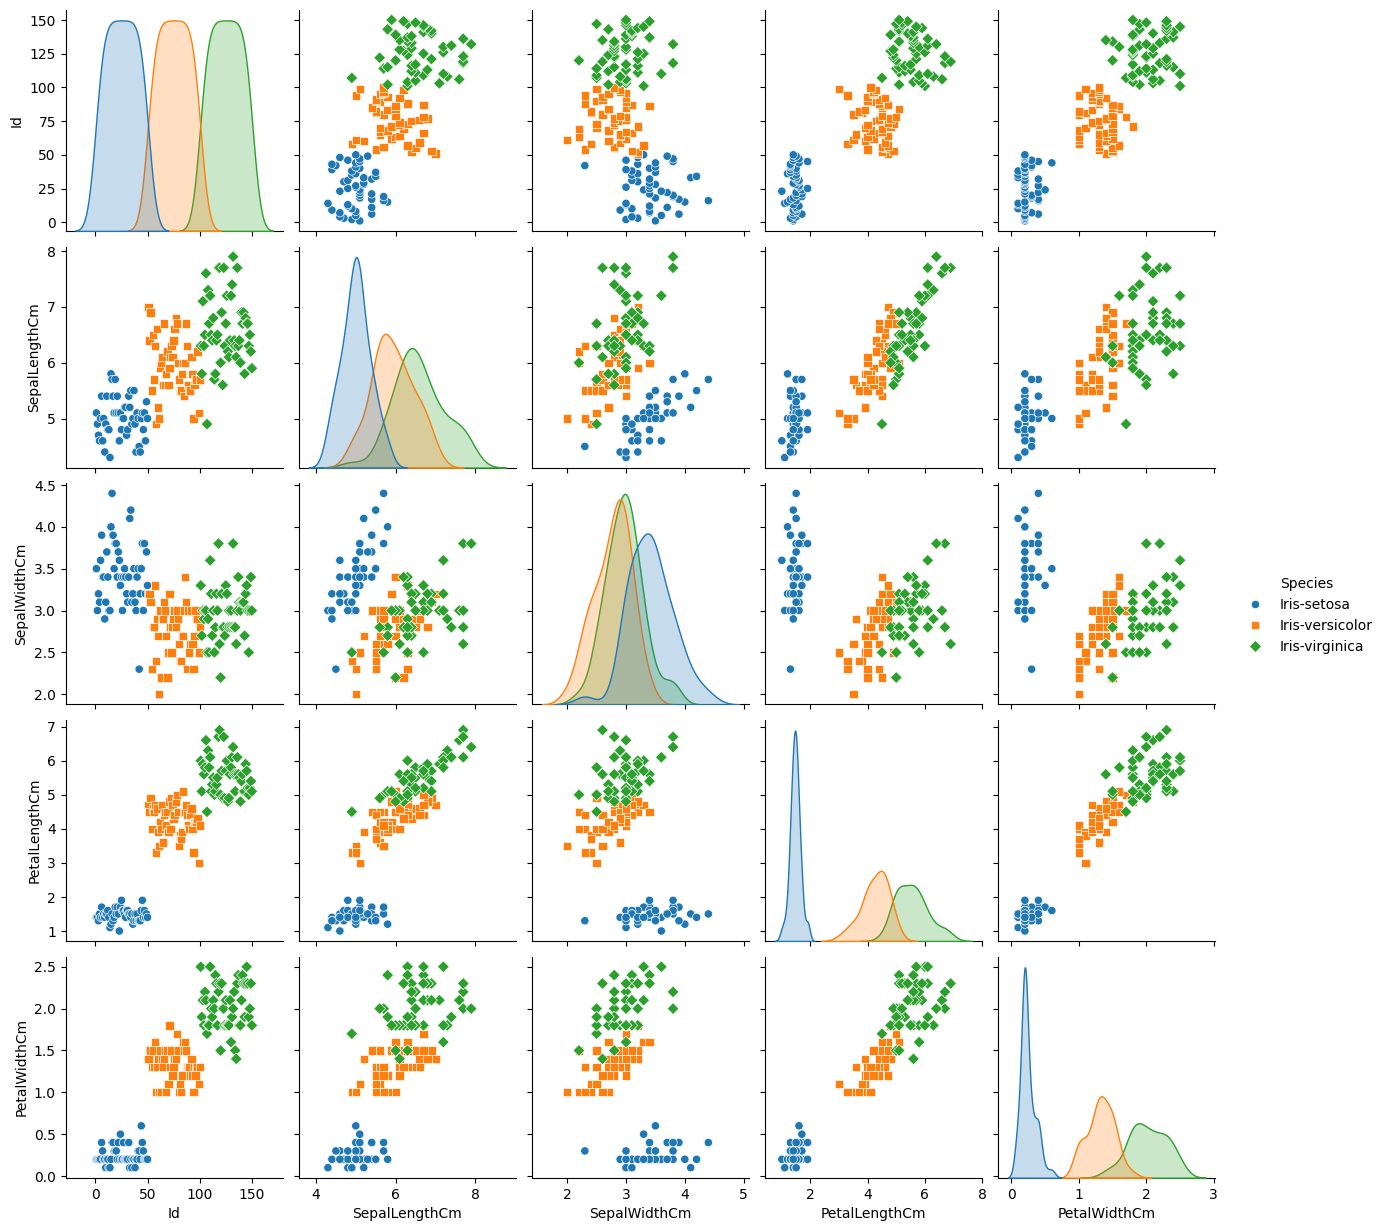

In [95]:
# Pairplot to visualize features by species
sns.pairplot(data, hue="Species", markers=["o", "s", "D"])
plt.show()

**Heatmap to Show Feature Correlation**

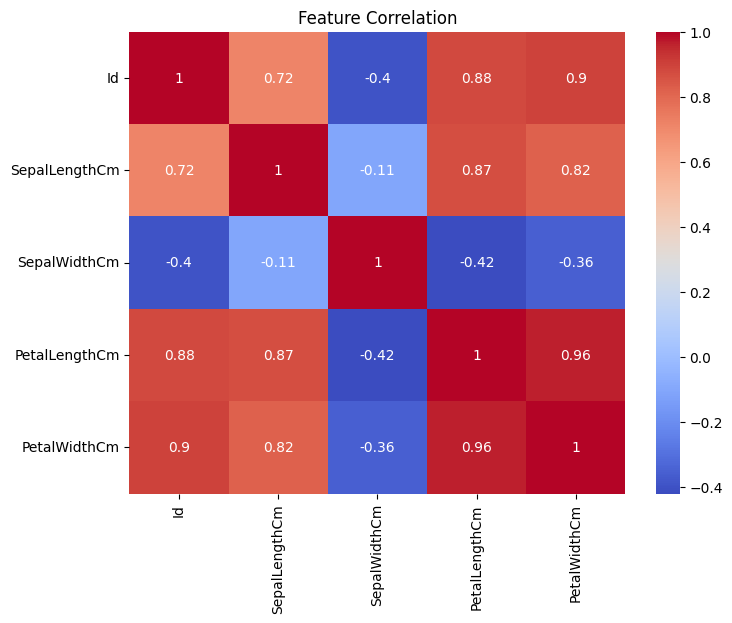

In [96]:
# Heatmap to visualize correlation
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

## **5. Data Preprocessing**

### **5.1. Encoding the Target Variable**

In [97]:
# Encode species labels into numbers
le = LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])
print("Encoded Species:", list(le.classes_))

Encoded Species: ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


## **5.2. Splitting the Dataset**

In [98]:
# Splitting features and target
X = data.drop(columns=["Id", "Species"], errors="ignore")
y = data["Species"]

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **5.3. Feature Scaling**

In [99]:
# Scale the features for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **6. Model Building**
### **6.1. Logistic Regression**

In [100]:
# Train a logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Evaluate logistic regression model
y_pred_lr = logistic_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## **6.2. K-Nearest Neighbors (KNN)**

In [101]:
# Train a KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Evaluate KNN model
y_pred_knn = knn_model.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## **7. Model Evaluation**
**Comparison of Logistic Regression and KNN**

Logistic Regression Accuracy: 1.0
KNN Accuracy: 1.0


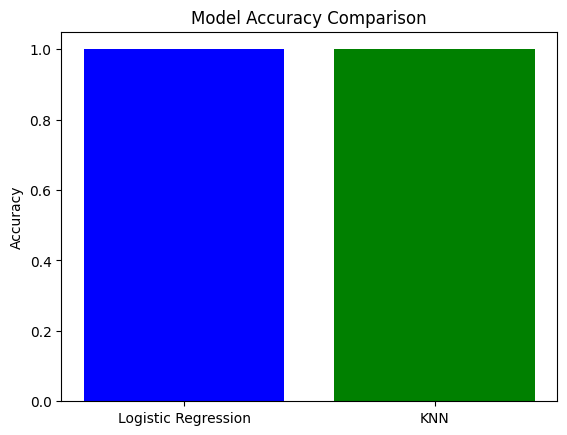

In [102]:
# Displaying accuracy for both models
logistic_accuracy = accuracy_score(y_test, y_pred_lr)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

print("Logistic Regression Accuracy:", logistic_accuracy)
print("KNN Accuracy:", knn_accuracy)

# Bar plot for comparison
plt.bar(['Logistic Regression', 'KNN'], [logistic_accuracy, knn_accuracy], color=['blue', 'green'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

## **8. Prediction**

In [103]:
# Verify the mapping of LabelEncoder
print("Label Mapping:")
for i, species in enumerate(le.classes_):
    print(f"{i} -> {species}")

Label Mapping:
0 -> Iris-setosa
1 -> Iris-versicolor
2 -> Iris-virginica


In [104]:
# Sample data for prediction
sample_data = np.array([[5.1, 3.5, 1.4, 0.2]])  # Replace with your own values

# Convert the sample data to a DataFrame with matching feature names
sample_df = pd.DataFrame(sample_data, columns=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"])

# Scale the sample data using the same scaler (fitted on the training data)
sample_scaled = scaler.transform(sample_df)

# Predict species using the KNN model
predicted_label = knn_model.predict(sample_scaled)  # Get numeric label prediction
predicted_species = le.inverse_transform(predicted_label)  # Convert numeric label to species name

# Print the prediction result
print(f"Predicted Species: {predicted_species[0]}")

Predicted Species: Iris-setosa
